<a href="https://colab.research.google.com/github/mudassaralye/EDA/blob/main/Instagram_Post_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Reading Dataset

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pio.templates.default="plotly_white"

df=pd.read_csv('/content/Instagram data.csv')

Show column names and have a look at their info.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


 Show the descriptive statistics of the data.

In [3]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


Check if your data contains any missing values

In [4]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Distribution of the Impressions

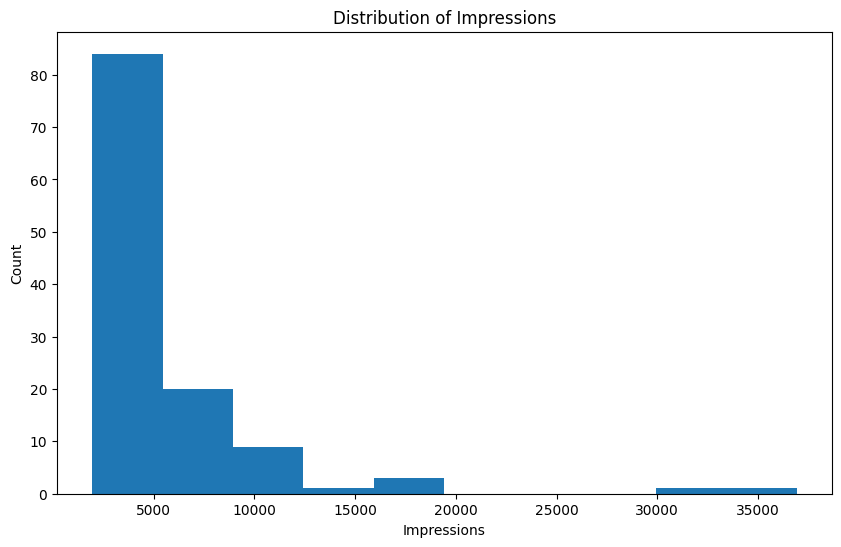

In [5]:
plt.figure(figsize=(10,6))
plt.hist(df['Impressions'])
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Count')
plt.show()

Have a look at the number of impressions on each post over time

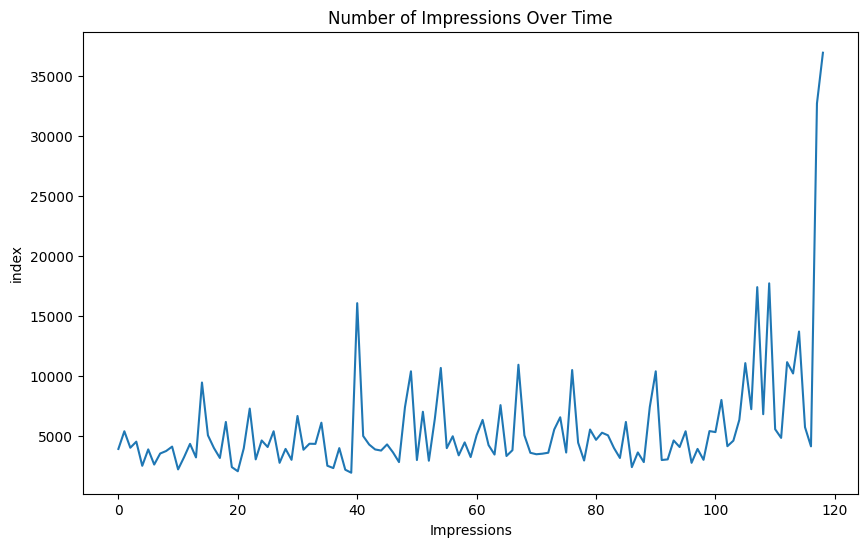

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Impressions'])
plt.title('Number of Impressions Over Time')
plt.xlabel('Impressions')
plt.ylabel('index')
plt.show()

Have a look at all the metrics like Likes, Saves, and Follows from each post over time

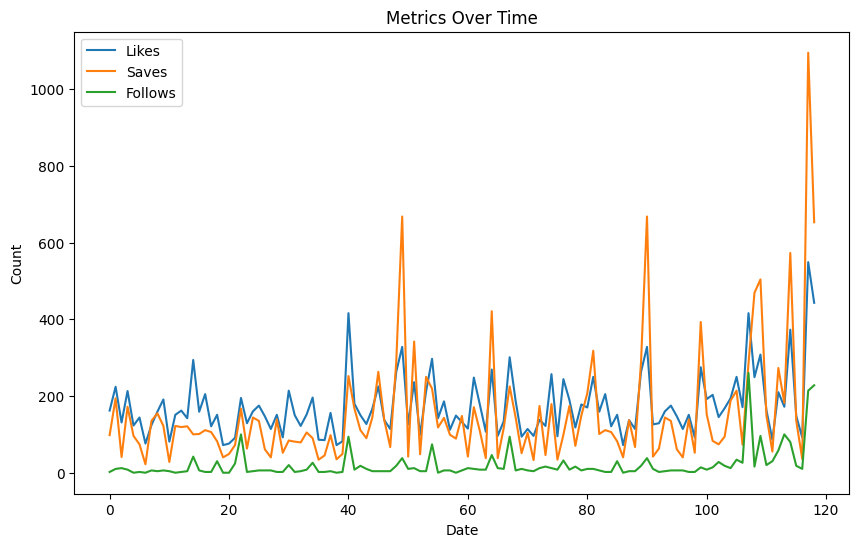

In [7]:
metrics = ['Likes', 'Saves', 'Follows']
plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(df.index, df[metric],label=metric)
plt.title('Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


Have a look at the distribution of reach from different sources

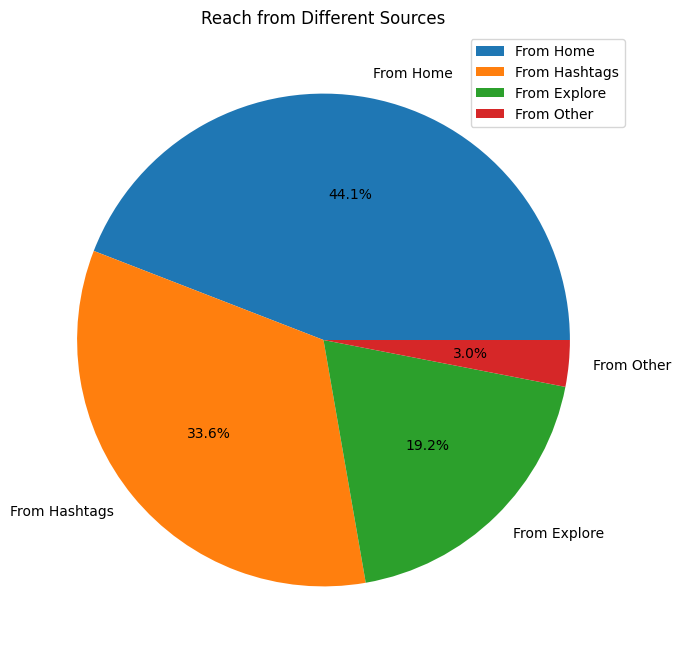

In [8]:
reach_sources=['From Home','From Hashtags','From Explore','From Other']
total_reach_by_source=df[reach_sources].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_reach_by_source, labels=total_reach_by_source.index,autopct='%1.1f%%')
plt.title('Reach from Different Sources')
plt.legend()
plt.show()


 Have a look at the distribution of engagement sources

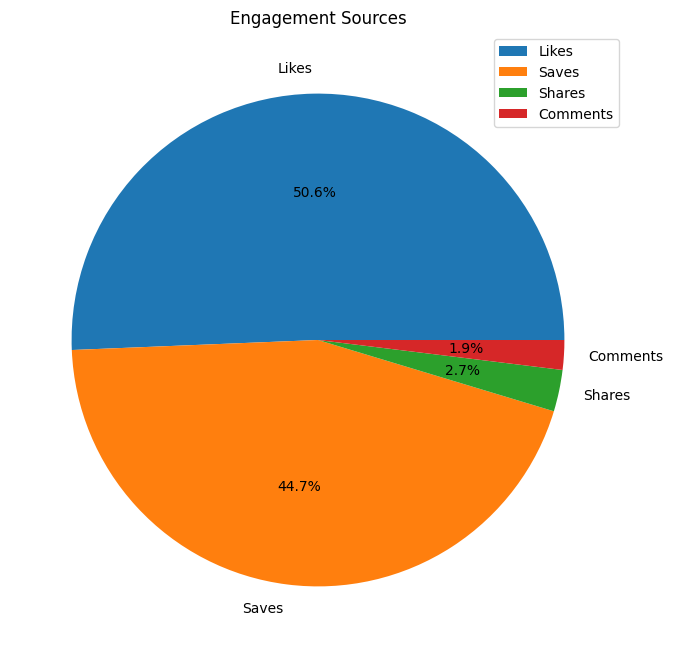

In [9]:
engagement_sources=['Likes','Saves','Shares','Comments']
total_engagement_by_source=df[engagement_sources].sum()
plt.figure(figsize=(8,8))
plt.pie(total_engagement_by_source,labels=total_engagement_by_source.index,autopct='%1.1f%%')
plt.title('Engagement Sources')
plt.legend()
plt.show()

Have a look at the relationship between the number of profile visits and follows

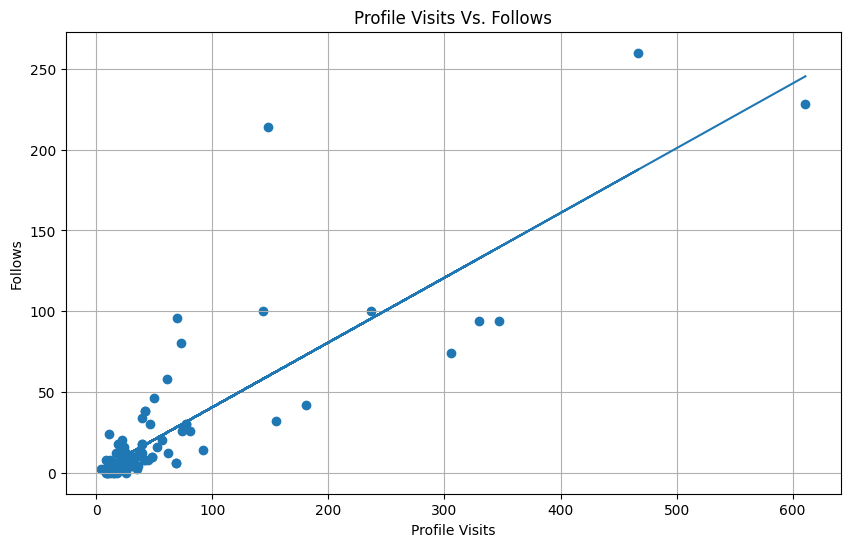

In [10]:
X=df['Profile Visits'].values.reshape(-1, 1)
y=df['Follows'].values

model=LinearRegression()
model.fit(X, y)
predictions=model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['Profile Visits'],df['Follows'])
plt.plot(df['Profile Visits'],predictions)
plt.title('Profile Visits Vs. Follows')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.grid(True)
plt.show()

 Have a look at the type of hashtags used in the posts using a wordcloud

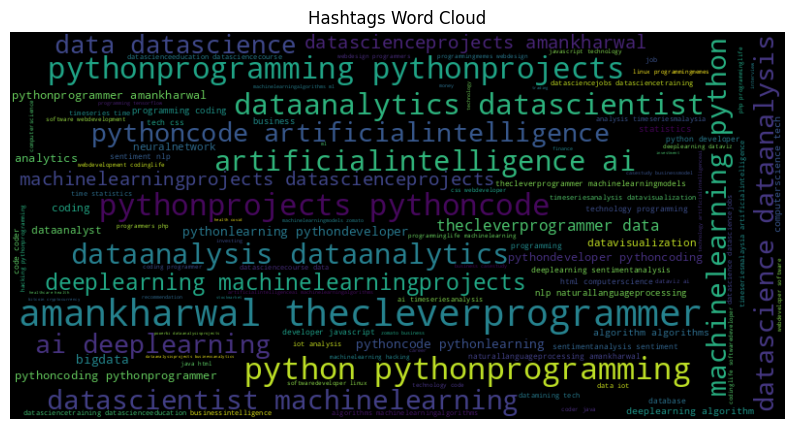

In [11]:
all_hashtags=' '.join(df['Hashtags'].dropna())
wordcloud=WordCloud(width=800, height=400,background_color='black').generate(all_hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Hashtags Word Cloud')
plt.axis('off')
plt.show()

Have a look at the correlation between all the features

<ipython-input-12-59c3498a3274>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


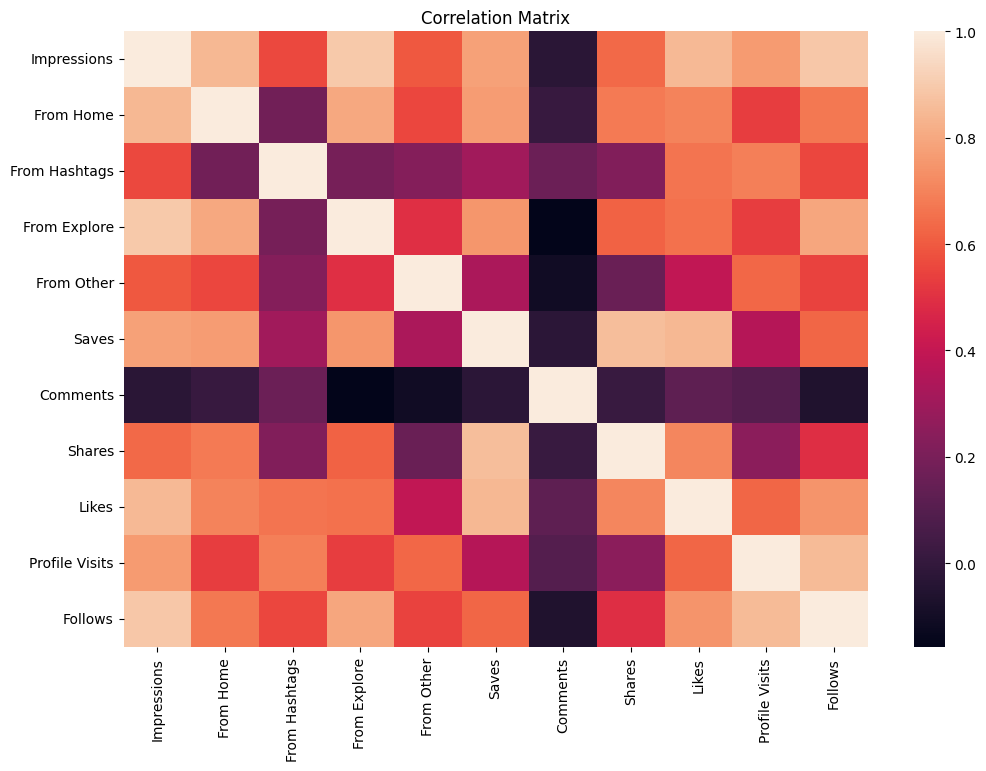

In [12]:
correlation_matrix=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()


 Have a look at the distribution of hashtags to see which hashtag is used the most in all the posts

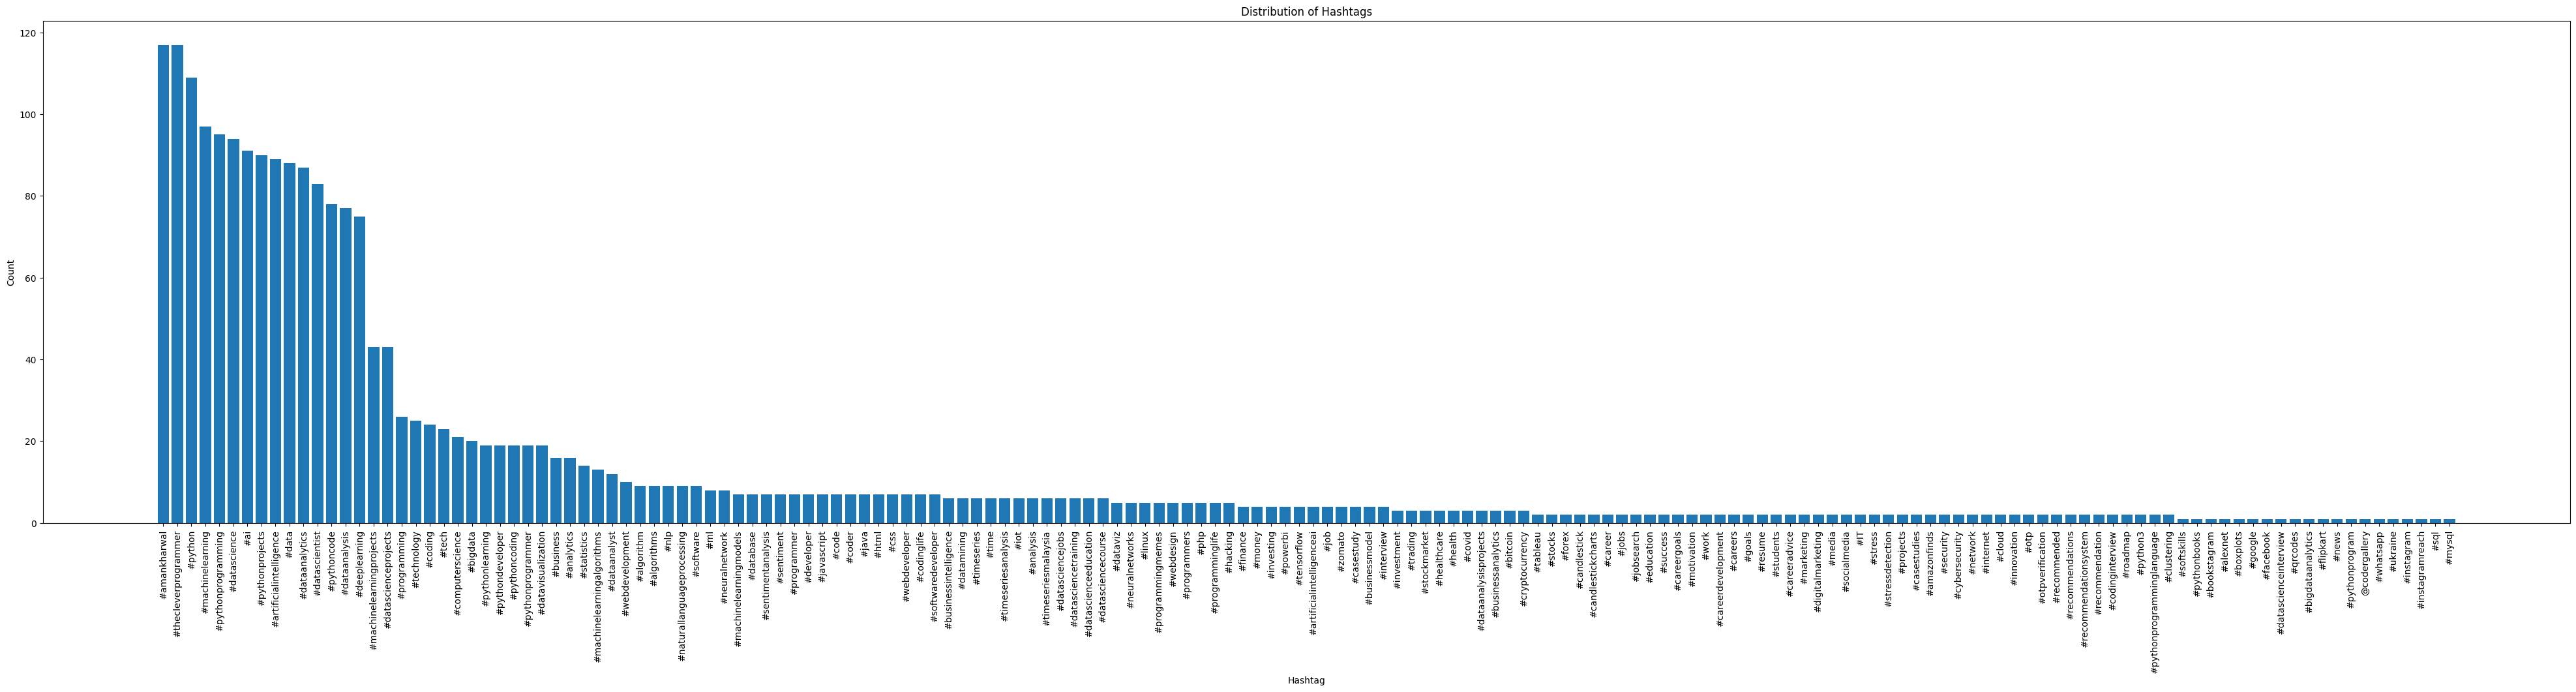

In [13]:
hashtags_list=all_hashtags.split()
hashtags_count={}
for hashtag in hashtags_list:
    hashtags_count[hashtag]=hashtags_count.get(hashtag,0)+1
sorted_hashtags=sorted(hashtags_count.items(),key=lambda x:x[1],reverse=True)
top_hashtags=sorted_hashtags[:]
hashtags,counts=zip(*top_hashtags)

plt.figure(figsize=(50,10))
plt.bar(hashtags,counts)
plt.title('Distribution of Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Observations**

The analysis of the Instagram data showed us how people engage with posts over time and where that engagement comes from, like whether they found the post through hashtags or their home feed. We also looked at the most popular hashtags used in posts. By understanding these patterns, we can figure out what types of content work best and how to make posts that people enjoy and interact with more.